In [290]:
import pandas as pd  # Used simply for loading and setting up data
import numpy as np   # Used for general array indexing
import torch         # All the actual machine-learning is here
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline



In [291]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Creating Predictors and Response Variables from Data

In [292]:

predictors = ['fixed acidity', 'volatile acidity', 'citric acid']
class_column = 'quality'

In [293]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid']]
Y = data[['quality']]


# Plotting Variables for Fixed Acidity

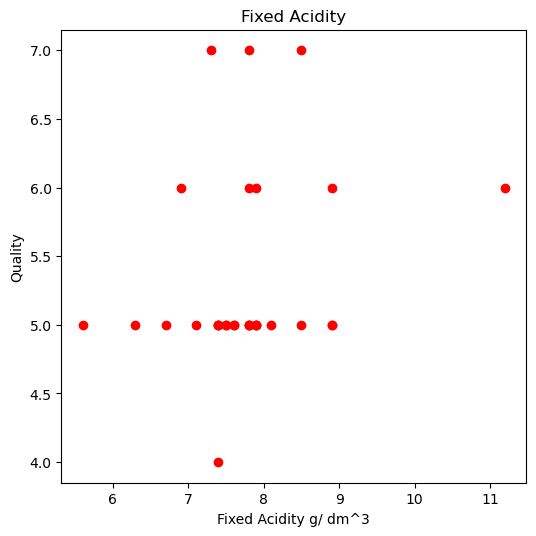

In [294]:

fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.set_title('Fixed Acidity')
ax.set_xlabel('Fixed Acidity g/ dm^3')
ax.set_ylabel('Quality')
ax.scatter(X['fixed acidity'][:30], Y[:30], color='red')


# Plotting variable for Volatile Acidity

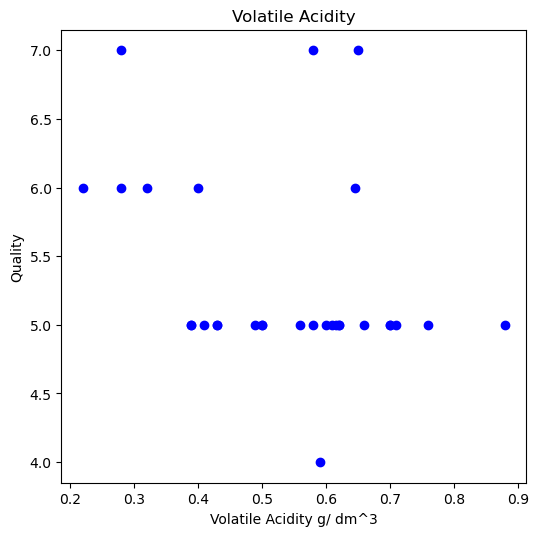

In [295]:

fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.set_title('Volatile Acidity')
ax.set_xlabel('Volatile Acidity g/ dm^3')
ax.set_ylabel('Quality')
ax.scatter(X['volatile acidity'][:30], Y[:30], color='blue')

# Plotting Variable for Citric Acid

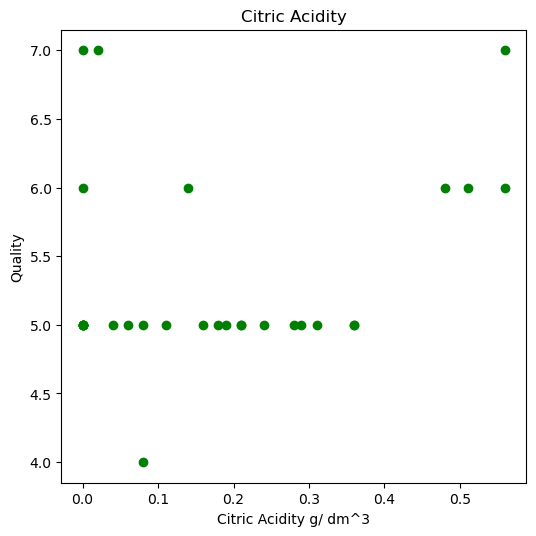

In [296]:

fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.set_title('Citric Acidity')
ax.set_xlabel('Citric Acidity g/ dm^3')
ax.set_ylabel('Quality')
ax.scatter(X['citric acid'][:30], Y[:30], color='green')

# Train Test Split

In [297]:

X_np = np.array(X)
Y_np = np.array(Y)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_np, Y_np, test_size = 0.2)


print(Xtest.shape)
print(Ytest.shape)


(320, 3)
(320, 1)


# Linear Regression

In [298]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit data into Linear Regression
model.fit(X_np,Y_np)


LinearRegression()

# Testing Linear Regression Algorithm & Printing Accuracy

In [299]:

correct = 0
incorrect = 0



predictions = model.predict(Xtest)
for i in range(320):
    if Ytest[i] == int(predictions[i]):
        correct += 1
        print(f' x variables: {Xtest[i]} actual quality: {Ytest[i]} predicted quality at: {int(predictions[i])} --> Guessed Correctly!' )
    else:
        incorrect += 1
        print(f' x variables: {Xtest[i]} actual quality: {Ytest[i]} predicted quality at: {int(predictions[i])} --> Guessed Incorrectly!' )
scoreValue = model.score(X_np,Y_np)
print(f'{scoreValue}')


 x variables: [8.1   0.825 0.24 ] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [9.1 0.5 0.3] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [6.  0.5 0. ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [10.8   0.32  0.44] actual quality: [6] predicted quality at: 6 --> Guessed Correctly!
 x variables: [8.4   0.745 0.11 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [5.6   0.605 0.05 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [6.9  0.44 0.  ] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [7.1  0.69 0.04] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [7.5  0.58 0.14] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [12.5   0.38  0.6 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x va

# Graphing Linear Regression Algorithm

Guessed Correct: 152 -- 47.5%
Guessed Incorrect: 168 -- 52.5%


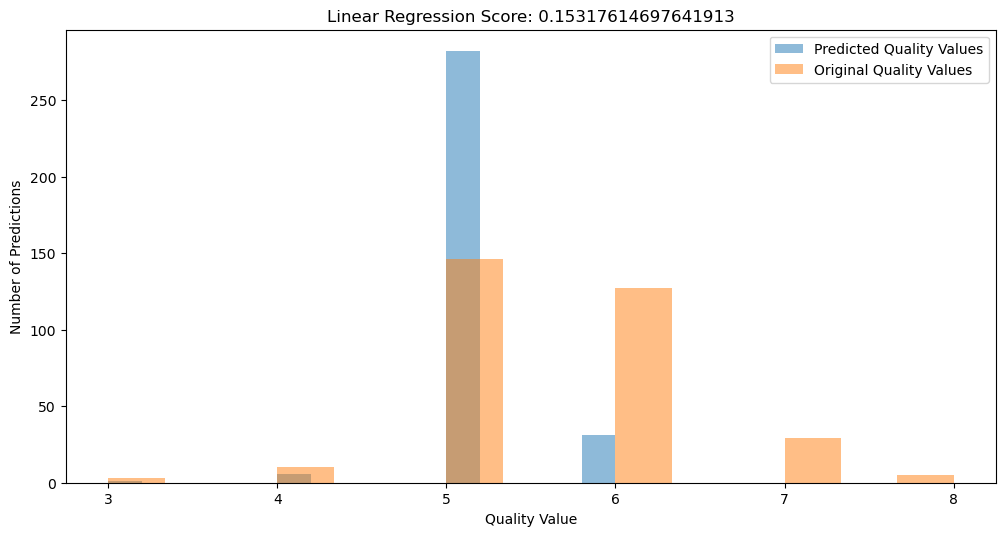

In [300]:
vector = np.vectorize(np.int)
predictions = vector(predictions)
print(f'Guessed Correct: {correct} -- {correct/320*100}%')
print(f'Guessed Incorrect: {incorrect} -- {incorrect/320*100}%')

fig,ax = plt.subplots(1, figsize=(12,6), dpi=100)
plt.title(f'Linear Regression Score: {scoreValue}')
ax.set_xlabel('Quality Value')
ax.set_ylabel('Number of Predictions')
plt.hist(predictions, 15, alpha=0.5, label='Predicted Quality Values')
plt.hist(Ytest, 15, alpha=0.5, label='Original Quality Values')
plt.legend()
plt.show()

# Decision Tree Regressor Algorithm

In [301]:

from sklearn.tree import DecisionTreeRegressor

T2 = DecisionTreeRegressor(max_depth=7)
T2.fit(Xtrain,Ytrain)

correct = 0
incorrect = 0
predictions = T2.predict(Xtest)
for i in range(320):
    if Ytest[i] == int(predictions[i]):
        correct += 1
        print(f' x variables: {Xtest[i]} actual quality: {Ytest[i]} predicted quality at: {int(predictions[i])} --> Guessed Correctly!' )
    else:
        incorrect += 1
        print(f' x variables: {Xtest[i]} actual quality: {Ytest[i]} predicted quality at: {int(predictions[i])} --> Guessed Incorrectly!' )
scoreValue = T2.score(X_np,Y_np)
print(f'{scoreValue}')


 x variables: [8.1   0.825 0.24 ] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [9.1 0.5 0.3] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [6.  0.5 0. ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [10.8   0.32  0.44] actual quality: [6] predicted quality at: 6 --> Guessed Correctly!
 x variables: [8.4   0.745 0.11 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [5.6   0.605 0.05 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [6.9  0.44 0.  ] actual quality: [6] predicted quality at: 5 --> Guessed Incorrectly!
 x variables: [7.1  0.69 0.04] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [7.5  0.58 0.14] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x variables: [12.5   0.38  0.6 ] actual quality: [5] predicted quality at: 5 --> Guessed Correctly!
 x va

# Graphing Decision Tree Regression Algorithm 

Guessed Correct: 152 -- 47.5%
Guessed Incorrect: 168 -- 52.5%


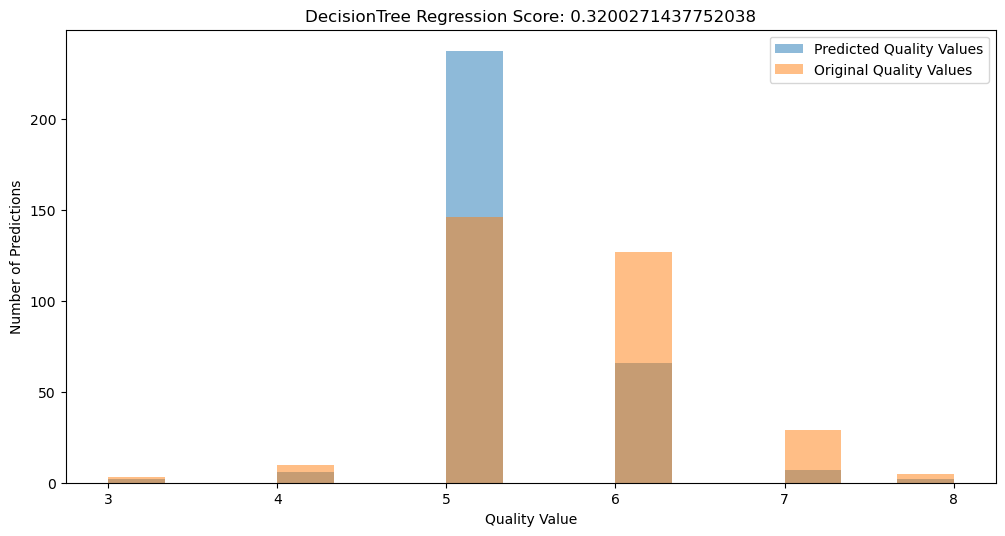

In [302]:
vector = np.vectorize(np.int)
predictions = vector(predictions)
print(f'Guessed Correct: {correct} -- {correct/320*100}%')
print(f'Guessed Incorrect: {incorrect} -- {incorrect/320*100}%')

fig,ax = plt.subplots(1, figsize=(12,6), dpi=100)
plt.title(f'DecisionTree Regression Score: {scoreValue}')
ax.set_ylabel('Number of Predictions')
ax.set_xlabel('Quality Value')
plt.hist(predictions, 15, alpha=0.5, label='Predicted Quality Values')
plt.hist(Ytest, 15, alpha=0.5, label='Original Quality Values')
plt.legend()
plt.show()

# Decision Tree Classification

In [303]:
from sklearn import tree

In [304]:
T = tree.DecisionTreeClassifier(max_depth=12)
T.fit(Ytest, predictions)
Lhat = T.predict(Ytest)


In [305]:
T.score(Ytest,predictions)


0.7875

In [306]:
print(f"Real   \t Predict   \t Same?\n")
same = 0
for i in range(len(Lhat)):
    print(f"{Ytest[i]}   \t {Lhat[i]}   \t     {Ytest[i] == Lhat[i]}" )
    if Ytest[i] == Lhat[i]:
        same += 1
print(same)
print(len(Lhat) - same)


Real   	 Predict   	 Same?

[6]   	 5   	     [False]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[6]   	 5   	     [False]
[6]   	 5   	     [False]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[4]   	 5   	     [False]
[5]   	 5   	     [ True]
[5]   	 5   	     [ True]
[8]   	 6   	     [False]
[7]   	 6 

# Logistic Regression Testing

In [307]:
from sklearn.linear_model import LogisticRegression

In [308]:
logModel = LogisticRegression()
i = 0

#Array of converted quality values greater than 5 or less than or equal to 5
quality = []

while i < len(data.quality):
    if data.quality[i] > 5:
        quality.append('good')
    else:
        quality.append('bad')
    i += 1
quality = np.array(quality)
X_train, X_test, Y_train, Y_test = train_test_split(data[['fixed acidity','volatile acidity','citric acid']], quality, test_size=0.2)

In [309]:
logModel.fit(X_train, Y_train)

LogisticRegression()

In [310]:
logModelPredictions = logModel.predict(X_test)
print(logModelPredictions)



['good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad

In [311]:
# Original data with the three predictor variables converted to np array
randomX = np.array(X)
# Predict each entry of orignal data with trained model.
i = 0
correctGuess = 0
incorrectGuess = 0
while i < len(data):
    logPrediction = logModel.predict([randomX[i]])
    if logPrediction == quality[i]:
        correctGuess += 1
    else:
        incorrectGuess += 1
    print(f'Input data: {[randomX[i]]} Actual Quality: {quality[i]} Predicted Quality: {logPrediction}')
    i += 1

Input data: [array([7.4, 0.7, 0. ])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.8 , 0.88, 0.  ])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.8 , 0.76, 0.04])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([11.2 ,  0.28,  0.56])] Actual Quality: good Predicted Quality: ['good']
Input data: [array([7.4, 0.7, 0. ])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.4 , 0.66, 0.  ])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.9 , 0.6 , 0.06])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.3 , 0.65, 0.  ])] Actual Quality: good Predicted Quality: ['bad']
Input data: [array([7.8 , 0.58, 0.02])] Actual Quality: good Predicted Quality: ['bad']
Input data: [array([7.5 , 0.5 , 0.36])] Actual Quality: bad Predicted Quality: ['good']
Input data: [array([6.7 , 0.58, 0.08])] Actual Quality: bad Predicted Quality: ['bad']
Input data: [array([7.5 , 0.5 , 0.36])] A

In [312]:
# Data evaluation
print(f'Predicted Correctly: {correctGuess/len(data)*100}%')
print(f'Predicted Incorrectly: {incorrectGuess/len(data)*100}%' )
print(f'Logistic Score: {logModel.score(X_test,Y_test)}')

Predicted Correctly: 63.664790494058785%
Predicted Incorrectly: 36.335209505941215%
Logistic Score: 0.61875


# Random Forest Classifier

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
# Using the entire data set predictor variables from original dataset instead of the first three
X_train, X_test, Y_train, Y_test = train_test_split(data[['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']], data.quality, test_size=0.2)

In [315]:
forestModel = RandomForestClassifier(n_estimators=50)

In [316]:
forestModel.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [317]:
forestModel.score(X_test,Y_test)

0.70625

In [318]:
y_predicted = forestModel.predict(X_test)

In [319]:
from sklearn.metrics import confusion_matrix

# Random Forest Graphing

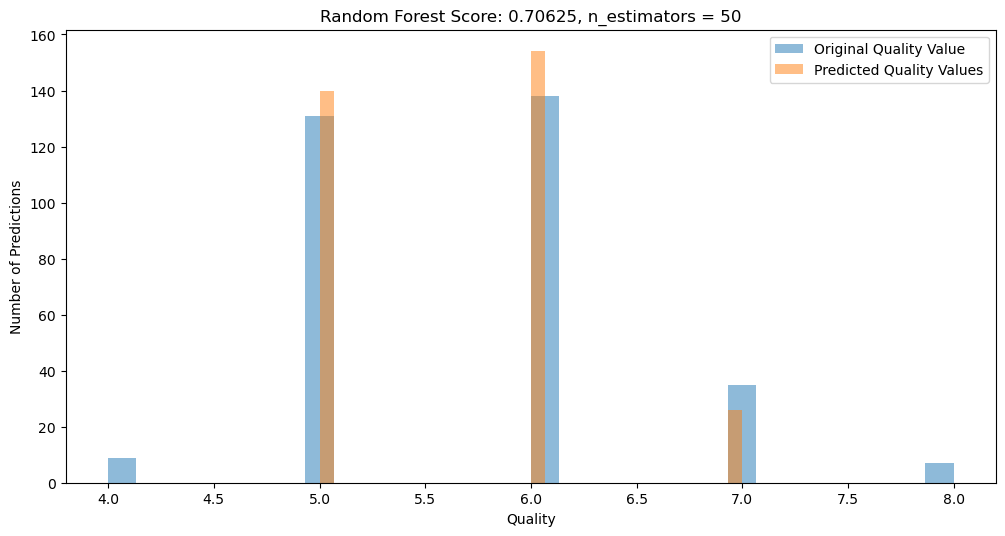

In [320]:
fig,ax = plt.subplots(1, figsize=(12,6), dpi=100)
plt.title(f'Random Forest Score: {forestModel.score(X_test,Y_test)}, n_estimators = 50')
ax.set_xlabel('Quality')
ax.set_ylabel('Number of Predictions')
plt.hist(Y_test, 30, alpha=0.5, label='Original Quality Value')
plt.hist(y_predicted, 30, alpha=0.5, label='Predicted Quality Values')
plt.legend()
plt.show()

# Neural Network

In [321]:
X_train = torch.tensor(X_train.values.astype(np.float32), device='cpu')
Y_train = torch.tensor(Y_train.values.astype(np.float32), device='cpu')
X_test = torch.tensor(X_test.values.astype(np.float32), device='cpu')
Y_test = torch.tensor(Y_test.values.astype(np.float32), device='cpu')

In [322]:
from torch.utils.data import TensorDataset, DataLoader

train_batch_size = 10
test_batch_size = 50

train_ds = TensorDataset(X_train, Y_train)
train_dl = DataLoader(dataset=train_ds, batch_size=train_batch_size, shuffle=True)

test_ds = TensorDataset(X_test, Y_test)
test_dl =  DataLoader(dataset=test_ds, batch_size=test_batch_size)  # No need to shuffle the testing data

In [340]:
class FFNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.input_to_hidden =  torch.nn.Linear(input_size, hidden_size)
        self.hidden_to_output = torch.nn.Linear(hidden_size, output_size)
        self.sig = torch.nn.Sigmoid()

    def forward(self, input):
        hidden = self.sig(self.input_to_hidden(input))
        output = self.hidden_to_output(hidden)
        return output

In [341]:
n_hidden = 2  # Let's use 2 variables in the hidden layer
n_categories = 1

ffnn = FFNN(11, n_hidden, n_categories)
ffnn.to('cpu')
for p in ffnn.parameters():
    print(p)

Parameter containing:
tensor([[ 0.2336,  0.1795,  0.1531,  0.0322,  0.0784, -0.0160, -0.1712, -0.0429,
          0.2824, -0.1594,  0.0264],
        [ 0.2138, -0.0657,  0.1764,  0.0875,  0.0703, -0.1789,  0.0383,  0.2374,
         -0.0745,  0.0026, -0.0707]], requires_grad=True)
Parameter containing:
tensor([-0.0414, -0.1809], requires_grad=True)
Parameter containing:
tensor([[-0.0430, -0.3172]], requires_grad=True)
Parameter containing:
tensor([-0.6411], requires_grad=True)


In [342]:
optimizer = torch.optim.SGD(ffnn.parameters(), lr=0.1, momentum=1.0)
loss_fn = torch.nn.MSELoss() 

In [343]:
def test_score(model, loss_func, test_dataloader):
    r""" A simple test-batch scoring method. """
    
    scores = []
    with torch.no_grad():  # compute no gradients
        model.eval()  # evaluation mode -- don't do any internal learning.
        for (x_batch, y_batch) in test_dataloader:
            output_batch = model(x_batch)
            loss = loss_func(output_batch, y_batch)
            scores.append(loss.item())
    return np.array(scores).mean()  # average score across batches

In [344]:
test_score(ffnn, loss_fn, test_dl)

42.91155678885324

In [345]:
test_score(ffnn, loss_fn, test_dl)

42.91155678885324

In [346]:
num_epochs = 100

for epoch in range(num_epochs):
    ffnn.train()  # put the model in training mode (not needed here, but good to remember to include)
    print(f"{epoch}", end=" ")
    for i, (x_batch, y_batch) in enumerate(train_dl):
        print(".", end="")
        output_batch = ffnn(x_batch)
        loss = loss_fn(output_batch, y_batch)

        optimizer.zero_grad()  # clear previous gradients
        loss.backward()        # compute gradients of all variables wrt loss
        optimizer.step()       # perform updates using calculated gradients
        
    testloss = test_score(ffnn, loss_fn, test_dl)
    print(f" test score {testloss}")


0 ................................................................................................................................ test score 0.7712450197764805
1 ................................................................................................................................ test score 23.699754442487443
2 ................................................................................................................................ test score 4.2447159971509665
3 ................................................................................................................................ test score 13.536808967590332
4 ................................................................................................................................ test score 16.964040892464773
5 ................................................................................................................................ test score 2.662515708378383
6 .................................

KeyboardInterrupt: 